# Estatística II

- Gráfico de dispersão: famoso scatter plot. Serve para ver os pontos x,y no plano cartesiano
- Regressão linear: representação em forma de reta de dados que se relacionam linearmente

## Correlação 

Mostra a força e direção entre variáveis

$R = [-1,1]$

A correlação $A \sim B$ é a mesma para $B \sim A$:

- $R \leq 0.5$ correlação fraca
- $0.5 < R \leq 0.7$ correlação moderada
- $0.7 < R < 1$ correlação forte
- $R = 1$ correlação perfeita

Coeficiente de determinação ($R^2$) mostra quanto o modelo explica os valores. O restante da variabilidade está em variáveis que não estão no modelo. Se incluir mais variáveis o modelo fica mais preciso (teoricamente)

> Correlação não é causa

## Regressão linear

Outliers: são valores forma do padrão, exorbitantes, muito longe do esperado. Reduzem muito a correlação dos dados

Extrapolação: Aumentar a faixa de valores com base na regressão.



In [1]:
!pip install yellowbrick pandas numpy matplotlib sklearn

You should consider upgrading via the '/home/pesadaum/development/learning/subject/data-science/forma-ds/modulo3/env/bin/python -m pip install --upgrade pip' command.


corr=array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])
model.intercept_=8.283905641787172, model.coef_=array([0.16556757])


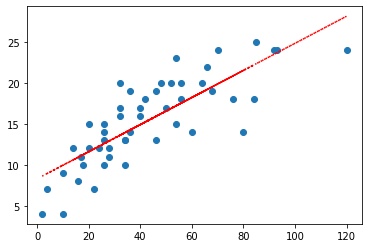

In [8]:
# Regressão linear
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./datasets/cars.csv')
df = df.drop(['Unnamed: 0'], axis=1)

X = df.iloc[:, 1].values
y = df.iloc[:, 0].values

corr = np.corrcoef(X,y)
print(f'{corr=}')

X = X.reshape(-1,1)
model = LinearRegression()
model.fit(X,y)

print(f'{model.intercept_=}, {model.coef_=}')

plt.scatter(X,y)
plt.plot(X, model.predict(X), ":r")

[11.92639228]
model._residues=478.02124836119646


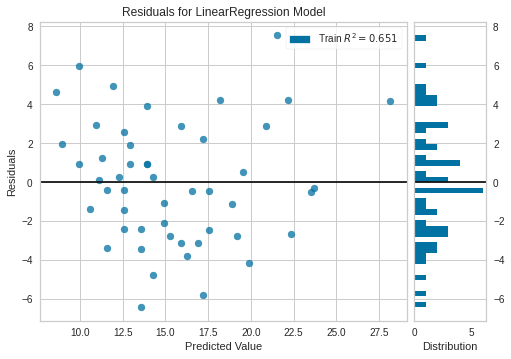

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [3]:
# Resíduos da regressão linear
from yellowbrick.regressor import ResidualsPlot

pred = model.intercept_ + model.coef_ * 22
print(pred)
# # outra forma
model.predict([[22]]) # a função só aceita array 2D \shrug

print(f'{model._residues=}')

view = ResidualsPlot(model)
view.fit(X,y)
view.poof()

## Condições para usar regressão linear

- Correlação deve ser moderada ou forte
- Coeficiente $R^2 \geq 0.7$
- Os resíduos padronizados devem estar aproximados de uma distribuição normal


corr=array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])
score=0.7183433404897299


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           9.38e-10
Time:                        11:49:18   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

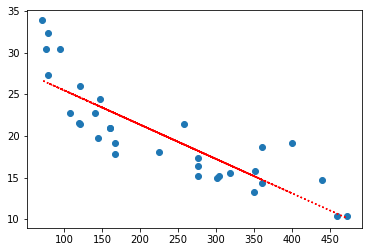

In [21]:
# Regressão linear simples x múltipla
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression


df = pd.read_csv('datasets/mtcars.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

X = df.iloc[:, 2].values
y = df.iloc[:, 0].values

corr = np.corrcoef(X,y)
print(f'{corr=}')

X = X.reshape(-1,1) # Reshape para poder usar o LinearRegression()
model = LinearRegression()
model.fit(X, y)
predict = model.predict(X)

plt.scatter(X,y)
plt.plot(X, predict, ':r')

score = model.score(X,y)
print(f'{score=}')

adjusted_model = sm.ols(formula= 'mpg ~ disp', data= df)
trained_model = adjusted_model.fit()
trained_model.summary()

In [23]:
# Agora a múltipla
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

X_mult = df.iloc[:, 1:4].values
y_mult = df.iloc[:, 0].values

model_mult = LinearRegression()
model_mult.fit(X_mult, y_mult)
predict_mult = model_mult.predict(X_mult)

score_mult = model_mult.score(X_mult, y_mult)
print(f'{score_mult=}')

adjusted_model_mult = sm.ols(formula='mpg ~ disp + cyl + hp', data=df)
trained_model_mult = adjusted_model_mult.fit()
trained_model_mult.summary()

# Num sei ainda se tem como visualizar a regressão múltpla mas definitivamente não é igual à regressão simples

score_mult=0.7678877440928636


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           5.05e-09
Time:                        11:51:13   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Fórmulas 

Correlação -> Inclinação -> Interceptação -> Previsão

## Correlação de pearson:

$$ r = \frac{cov(X,Y)}{\sqrt{var(x) \cdot var(y)}}$$

## Inclinação

Onde $S_a = $ desvio padrão de 'a':

$$ m = r \left( \frac{S_y}{S_x} \right)$$

## Interceptação

 (equação da reta) onde $\bar{a} = $ média de a:

$$ b = \bar{y} - m\bar{x}$$

## Previsão

Onde v é a variável dependente:

$$P = b + (m \cdot v)$$





# Regressão logística

Semelhante à linear, mas a resposta é binária. pode ser simples ou múltipla também

In [ ]:
# Regressão logística
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# Falta o arquivo :/
